In [1]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Fabio Palmisano -*-
# -*- date : 2024-01-20 -*-
# -*- Last revision: 2024-01-20 (Vincent Roduit)-*-
# -*- python version : 3.11.6 -*-
# -*- Description: Notebook that summarizes results-*-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/EE-411-FOIL-Project/source

/content/drive/MyDrive/EE-411-FOIL-Project/source


# <center> EE - 411: Fundamentals of Inference and Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Deep Double Descent: When Bigger Models and More Data Hurt </center>
---

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Import librairies
import os

In [6]:
# Import files
from training_utils import*
from functions import*
from display_functions import*
from data_utils import*
from data_classes import*

# 1. Introduction

## 1.1 Vizualize the Dataset

### 1.1.1 Define class dictionaries

In [7]:
#CIFAR-10
metadata_path = '../data/datasets/cifar-10-batches-py/batches.meta'
metadata = unpickle(metadata_path)
cifar10_dict = [label.decode('utf-8') for label in metadata[b'label_names']]

#CIFAR-100
metadata_path = '../data/datasets/cifar-100-python/meta'
metadata = unpickle(metadata_path)
cifar100_dict = [label.decode('utf-8') for label in metadata[b'fine_label_names']]

### 1.1.2 Vizualize Datasets

#### MNIST

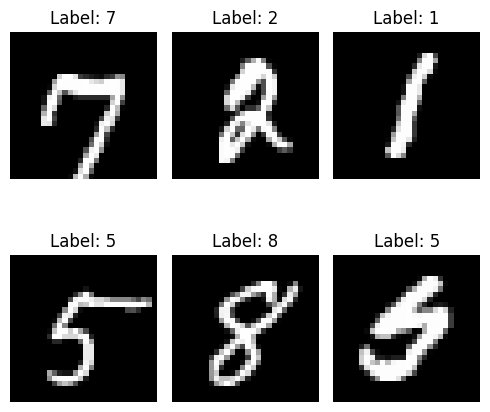

In [8]:
MNIST = NoisyMNIST()
visualize_dataset((np.array(MNIST.mnist.data), np.array(MNIST.mnist.targets)), num_images=6)

#### CIFAR 10

Files already downloaded and verified


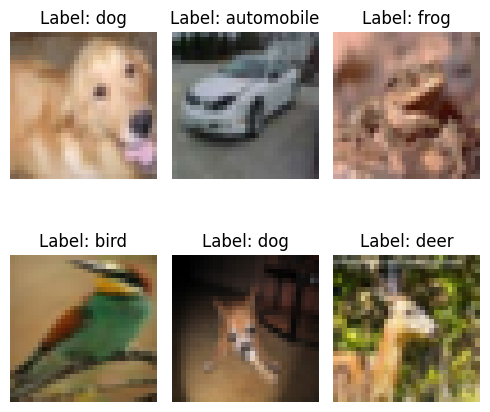

In [9]:
CIFAR10 = NoisyCIFAR10()
visualize_dataset((np.array(CIFAR10.cifar10.data), np.array(CIFAR10.cifar10.targets)), num_images=6,label_names=cifar10_dict)

#### CIFAR 100

Files already downloaded and verified


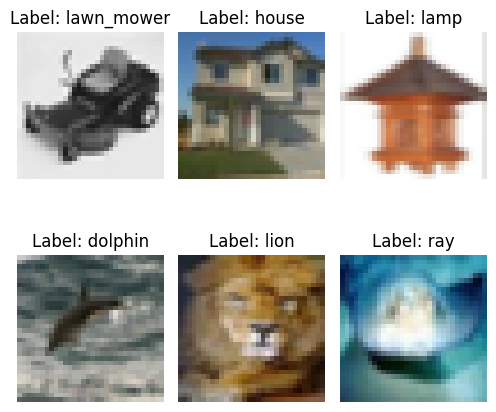

In [10]:
CIFAR100 = NoisyCIFAR100()
visualize_dataset((np.array(CIFAR100.cifar100.data), np.array(CIFAR100.cifar100.targets)), num_images=6,label_names=cifar100_dict)

# 2. Figure 4

## 2.1 MNIST

In [ ]:
width_model_list = np.linspace(1, 64, 30,dtype=int)
noise_ratio_list = [0,0.1,0.2]

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_models(noise_ratio_list,
                                                                             width_model_list,
                                                                             optimizer='Adam',
                                                                             model='ResNet',
                                                                             dataset_name='MNIST')

#### Obtain pre computed results stored as pickle files
As the computation of these figures is time expensive, results are stored in pickle format in order to plot without computing each time

In [ ]:
test_acc_sgd = open_pickle(os.path.join(constants.FIG6_FOLDER, 'test_accuracies_Adam.pkl'))
test_acc_adam = open_pickle(os.path.join(constants.FIG6_FOLDER, 'test_accuracies_SGD.pkl'))
test_error_sgd = (100 - np.array(test_acc_sgd)) / 100
test_error_adam = (100 - np.array(test_acc_adam)) / 100

display_optimizer_stats(test_error_adam,test_error_sgd,width_model_list)

In [ ]:
test_accuracies_path = os.path.join(constants.FIG4_FOLDER, 'test_acc.pkl')
test_accuracies = open_pickle(test_accuracies_path)
test_errors = (100 - np.array(test_accuracies)) / 100
display_error(error_lists=test_errors,width_model_list=width_model_list,noise_ratio_list=noise_ratio_list,train=False)

In [ ]:
train_accuracies_path = os.path.join(constants.FIG4_FOLDER, 'train_acc.pkl')
train_accuracies = open_pickle(test_accuracies_path)
train_errors = (100 - np.array(test_accuracies)) / 100
display_error(error_lists=train_errors,width_model_list=width_model_list,noise_ratio_list=noise_ratio_list,train=True)

## 3. Figure 6 : SGD vs Adam
5 Layer CNNs on CIFAR 10, no label noise, no data augmentation, using SGD for 500k gradient step, adam for 4K epochs

In [ ]:
#Parameters to test
width_model_list = np.linspace(1, 64, 20,dtype=int)
noise_ratio_list = [0.2]

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_models(noise_ratio_list,
                                                                            width_model_list,
                                                                            optimizer = 'Adam',
                                                                            model='CNN',
                                                                            dataset_name='CIFAR10')
train_losses_SGD, train_accuracies_SGD, test_losses_SGD, test_accuracies_SGD = train_models(noise_ratio_list,
                                                                                            width_model_list,
                                                                                            optimizer = 'SGD',
                                                                                            model='CNN',
                                                                                            dataset_name='CIFAR10')

## 4. Further Experiments

#### 4.1 Test the convergence

In [12]:
losses_k4, test_loss_k4,test_accuracy_k4 = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=200, noise_ratio=0.2, width=4)

Training model


Starting

Files already downloaded and verified
Files already downloaded and verified


KeyboardInterrupt: 

In [13]:
with open("Accuracy_Test_200.pkl", "wb") as f:
    pickle.dump(test_accuracy_k4, f)

In [14]:
test_accuracy_k4


46.86000061035156

In [ ]:
with open("losses_k4.pkl", "wb") as f:
    pickle.dump(losses_k4, f)

with open("test_loss_k4.pkl", "wb") as f:
    pickle.dump(test_loss_k4, f)

with open("test_accuracy_k4.pkl", "wb") as f:
    pickle.dump(test_accuracy_k4, f)

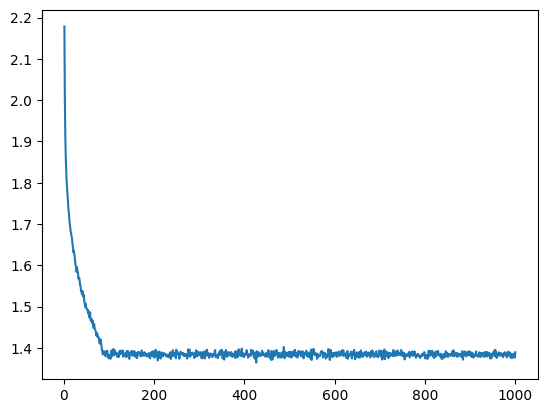

In [11]:
import pickle

epoch = 1000
# Open the pickle file and load its contents
with open("losses_k4.pkl", "rb") as file:
    data = pickle.load(file)

plt.plot(np.linspace(1,1000,1000), data, label='Training loss')

Training model


Epoch 1000/1000: Loss = 0.9929231437270903

Files already downloaded and verified
Files already downloaded and verified


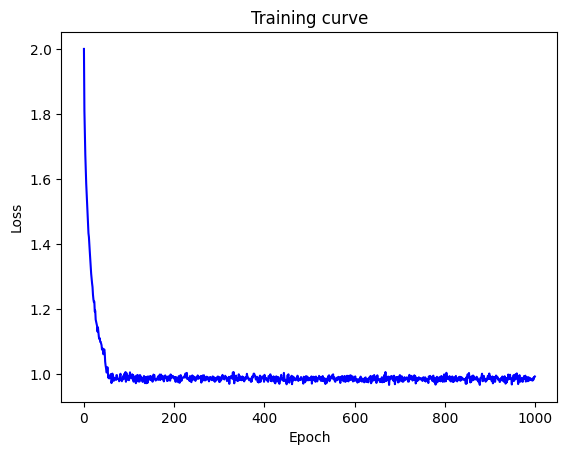

In [12]:
losses_k10, test_loss_k10,test_accuracy_k10 = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=1000, noise_ratio=0.2, width=10)

In [13]:
with open("losses_k10.pkl", "wb") as f:
    pickle.dump(losses_k10, f)

with open("test_loss_k10.pkl", "wb") as f:
    pickle.dump(test_loss_k10, f)

with open("test_accuracy_k10.pkl", "wb") as f:
    pickle.dump(test_accuracy_k10, f)

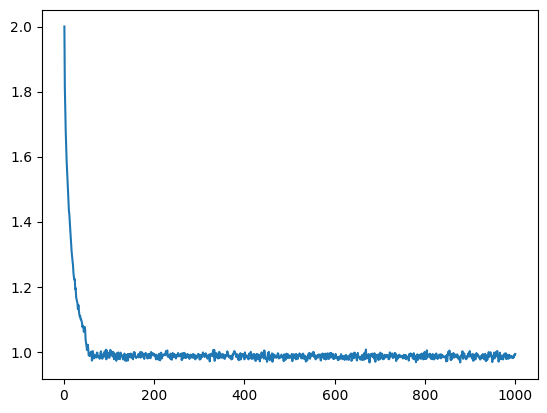

In [14]:
import pickle

epoch = 1000
# Open the pickle file and load its contents
with open("losses_k10.pkl", "rb") as file:
    data = pickle.load(file)

plt.plot(np.linspace(1,1000,1000), data, label='Training loss')

Training model


Epoch 200/200: Loss = 1.4188775382078518

Files already downloaded and verified
Files already downloaded and verified


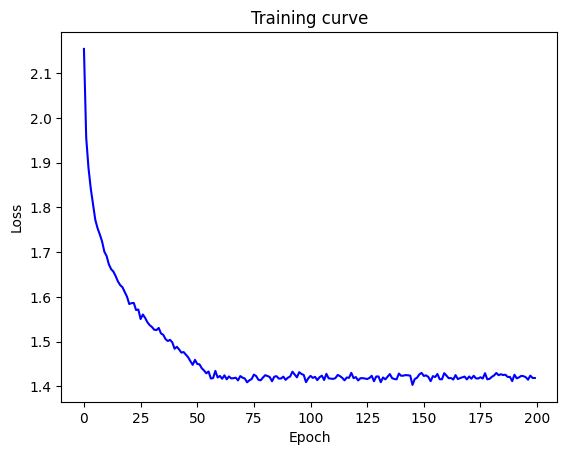

In [15]:
losses_200, test_loss_200,test_accuracy_200 = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=200, noise_ratio=0.2, width=4)

Training model


Epoch 200/200: Loss = 0.9562045187901353

Files already downloaded and verified
Files already downloaded and verified


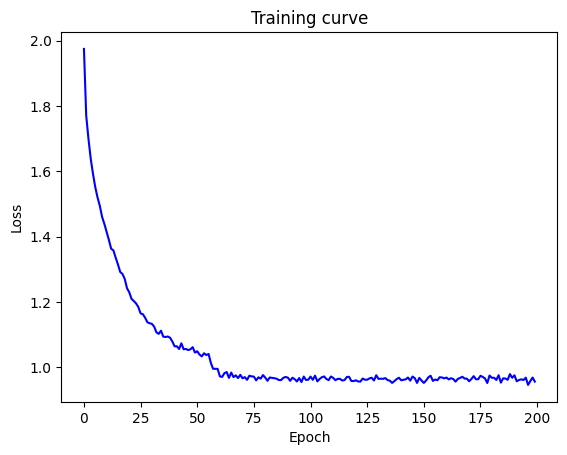

In [17]:
losses_k4, test_loss_k4,test_accuracy_k4 = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=200, noise_ratio=0.2, width=10)

In [18]:
with open("losses_test200.pkl", "wb") as f:
    pickle.dump(losses_200, f)

with open("test_loss_test200.pkl", "wb") as f:
    pickle.dump(test_loss_200, f)

with open("test_accuracy_test200.pkl", "wb") as f:
    pickle.dump(test_accuracy_200, f)

LAST RUN WITH 10000 TEST SAMPLES

Training model


Epoch 1000/1000: Loss = 1.3997308735347465

Files already downloaded and verified
Files already downloaded and verified


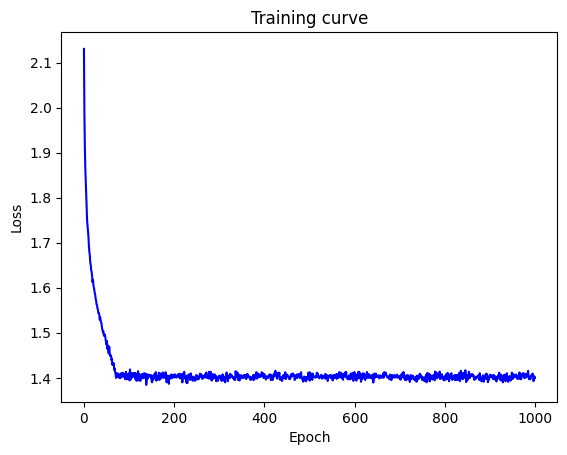

In [17]:
losses_k4_, test_loss_k4_,test_accuracy_k4_ = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=1000, noise_ratio=0.2, width=4)

In [18]:
with open("losses_k_LastVersion.pkl", "wb") as f:
    pickle.dump(losses_k4_, f)

with open("test_loss_k4_LastVersion.pkl", "wb") as f:
    pickle.dump(test_loss_k4_, f)

with open("test_accuracy_k4_LastVersion.pkl", "wb") as f:
    pickle.dump(test_accuracy_k4_, f)

Training model


Epoch 1000/1000: Loss = 0.9883382914926085

Files already downloaded and verified
Files already downloaded and verified


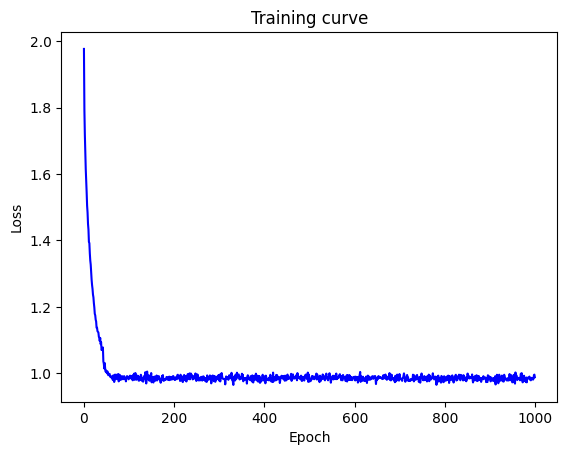

In [20]:
losses_k10_, test_loss_k10_,test_accuracy_k10_ = model_convergence(optimizer='Adam', model='ResNet',dataset_name='CIFAR10',num_epochs=1000, noise_ratio=0.2, width=10)

In [21]:
with open("losses_k10_LastVersion.pkl", "wb") as f:
    pickle.dump(losses_k10_, f)

with open("test_loss_k10_LastVersion.pkl", "wb") as f:
    pickle.dump(test_loss_k10_, f)

with open("test_accuracy_k10_LastVersion.pkl", "wb") as f:
    pickle.dump(test_accuracy_k10_, f)

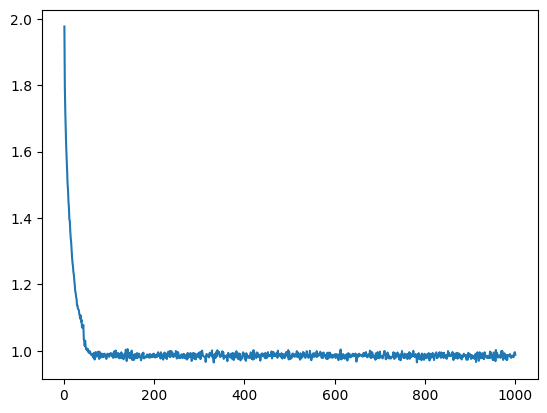

In [22]:
import pickle

epoch = 1000
# Open the pickle file and load its contents
with open("losses_k10_LastVersion.pkl", "rb") as file:
    data = pickle.load(file)

plt.plot(np.linspace(1,1000,1000), data, label='Training loss')

In [23]:
test_accuracy_k10_

46.72999954223633

In [24]:
test_accuracy_k4_

46.65999984741211